### Preparing a dataset for modeling
__May, 2018 - Christopher Sanchez__

This is a dataset I retrieved from Kaggle containing various information about the countries around the world.

The goal today is to select an outcome variable and a few other variables in order to act as the basis of features, create 10 new features from the selected variables, and then choose the 5 best features using filtering methods. 


In [1]:
# Importing needed libraries and options

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('countriesoftheworld.csv')

In [2]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


There are many interesting variables. I am interested in seeing how other variables effect net migration. The variables I will test are:
- Population,
- Net migration,
- Infant mortality,
- GDP per capita,
- Literacy,
- Birthrate, and
- Deathrate. 

I will begin by cleaning the data so I can program the data more effectively.

In [3]:
# REMOVING UNECESSARY COLUMNS AND RENAMING TO IMPLEMENT CODE FASTER

df2 = df[['Population','Net migration','Infant mortality (per 1000 births)', 'GDP ($ per capita)','Literacy (%)','Birthrate','Deathrate']].dropna()
df2 = df2.rename(columns={'Net migration': 'Net_migration', 'Infant mortality (per 1000 births)': 'Infant_mortality','GDP ($ per capita)': 'GDP_per_cap', 'Literacy (%)': 'Literacy'})

# REPLACING "," WITH "." AND CONVERTING DATA TO FLOATS

df2['Net_migration'] = df2['Net_migration'].str.replace(",",".").astype('float')
df2['Infant_mortality'] = df2['Infant_mortality'].str.replace(",",".").astype('float')
df2['Literacy'] = df2['Literacy'].str.replace(",",".").astype('float')
df2['Birthrate'] = df2['Birthrate'].str.replace(",",".").astype('float')
df2['Deathrate'] = df2['Deathrate'].str.replace(",",".").astype('float')

# DISPLAYING THE NEW HEAD

df2.head()

,Population,Net_migration,Infant_mortality,GDP_per_cap,Literacy,Birthrate,Deathrate
0,31056997,23.06,163.07,700.0,36.0,46.60,20.34
1,3581655,-4.93,21.52,4500.0,86.5,15.11,5.22
2,32930091,-0.39,31.00,6000.0,70.0,17.14,4.61
3,57794,-20.71,9.27,8000.0,97.0,22.46,3.27
4,71201,6.60,4.05,19000.0,100.0,8.71,6.25


In [4]:
df2.describe()

,Population,Net_migration,Infant_mortality,GDP_per_cap,Literacy,Birthrate,Deathrate
count,2.060000e+02,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,3.153934e+07,0.015971,37.117864,9698.058252,82.889320,22.319175,9.369709
std,1.234359e+08,4.971406,36.193617,10189.540123,19.701984,11.214983,5.136261
min,7.026000e+03,-20.990000,2.290000,500.000000,17.600000,7.290000,2.290000
25%,7.715090e+05,-0.962500,8.457500,1900.000000,71.500000,12.802500,5.820000
50%,5.903757e+06,0.000000,23.395000,5550.000000,92.400000,18.845000,7.830000
75%,2.025362e+07,0.927500,61.492500,14850.000000,98.000000,29.785000,11.387500
max,1.313974e+09,23.060000,191.190000,55100.000000,100.000000,50.730000,29.740000


## Exploratory Plots

We will explore the chosen variables below using univariate methods.

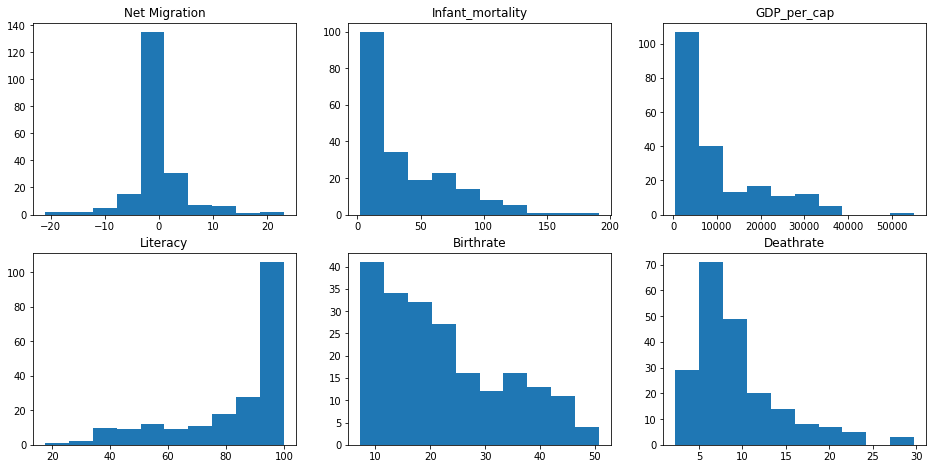

In [5]:
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.hist(df2.Net_migration)
plt.title('Net Migration')
plt.subplot(3,3,2)
plt.hist(df2.Infant_mortality)
plt.title('Infant_mortality')
plt.subplot(3,3,3)
plt.hist(df2.GDP_per_cap)
plt.title('GDP_per_cap')
plt.subplot(3,3,4)
plt.hist(df2.Literacy)
plt.title('Literacy')
plt.subplot(3,3,5)
plt.hist(df2.Birthrate)
plt.title('Birthrate')
plt.subplot(3,3,6)
plt.hist(df2.Deathrate)
plt.title('Deathrate');

- A majority of the worlds net migration is between -5% and 5%.
- Most Infant mortality rates are less than 50%
- The average GDP is very low with most people making less than $10,000
- Literacy rates are high with some countries even being 100% literate.
- Birthrates start descending from about 5%
- Deathrates seem to congregate between 0% and 10%

## Bivariate exploration

Below I will examine the bivariate relationships amongst the various selected variables utilizing bivariate techniques. I will create a correlation matrix and visualize it using a heat map.

                  Population  Net_migration  Infant_mortality  GDP_per_cap  Literacy  Birthrate  Deathrate
Population          1.000000       0.001179          0.012693    -0.040520 -0.044716  -0.051345  -0.034942
Net_migration       0.001179       1.000000         -0.031130     0.411497 -0.008094  -0.084849   0.031897
Infant_mortality    0.012693      -0.031130          1.000000    -0.611023 -0.765190   0.860127   0.666351
GDP_per_cap        -0.040520       0.411497         -0.611023     1.000000  0.517236  -0.643218  -0.227256
Literacy           -0.044716      -0.008094         -0.765190     0.517236  1.000000  -0.791247  -0.393946
Birthrate          -0.051345      -0.084849          0.860127    -0.643218 -0.791247   1.000000   0.432999
Deathrate          -0.034942       0.031897          0.666351    -0.227256 -0.393946   0.432999   1.000000


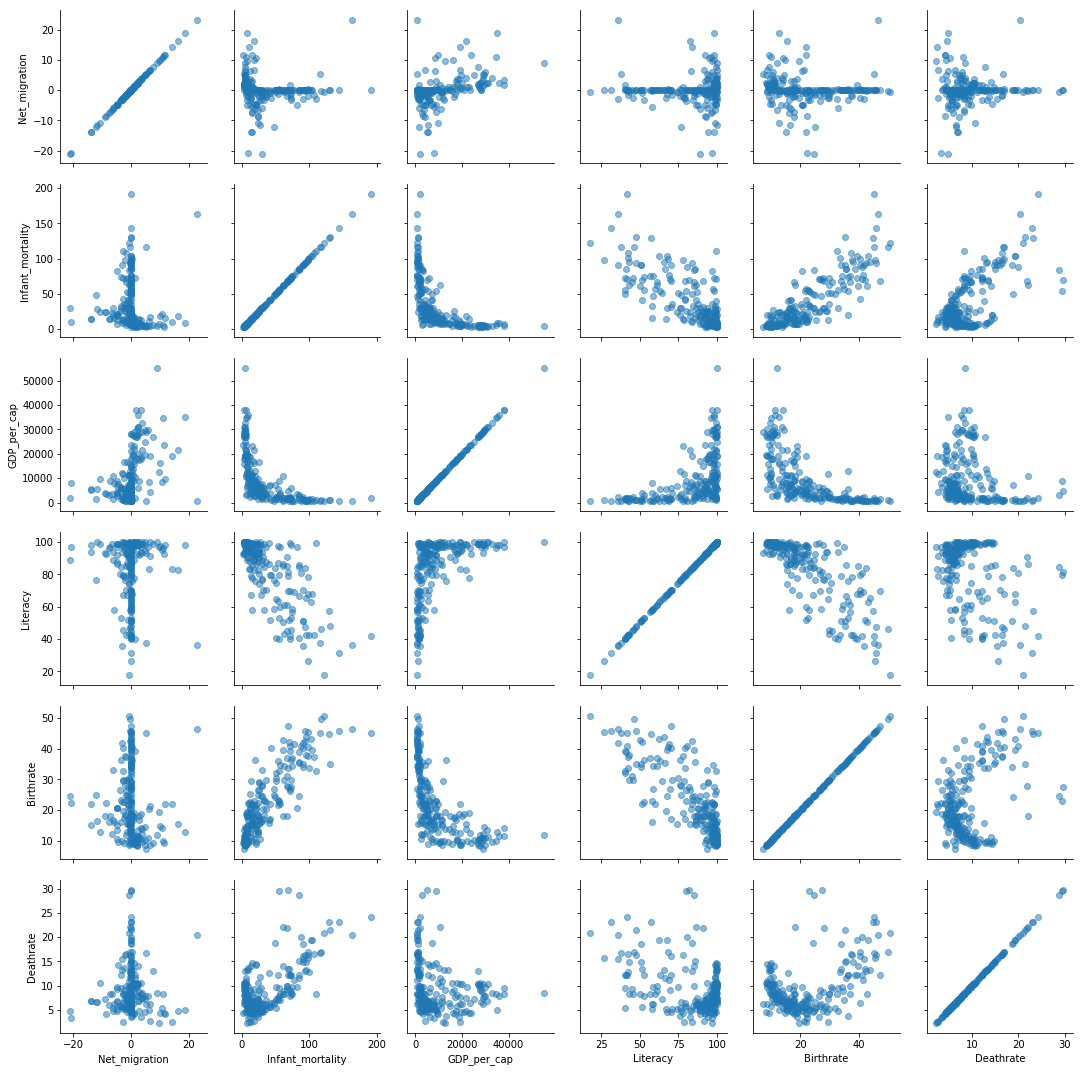

In [6]:
# creating and visualizing the correlation matrix
corrmat = df2.corr()
print(corrmat)

# Creating a pairgrid of scatter plots to evaluate bivariate relationships.
df2_pairgrid = df2.loc[:, 'Net_migration':'Deathrate']
g = sns.PairGrid(df2_pairgrid, diag_sharey=False);
g.map(plt.scatter, alpha=.5);

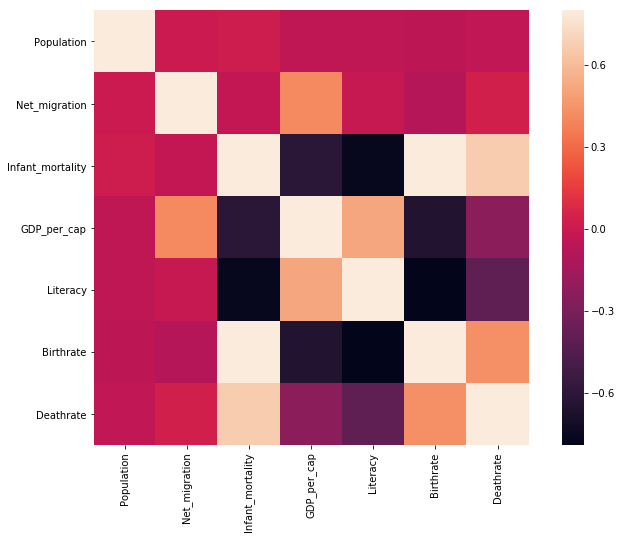

In [7]:
# Creating and displaying a heat map of the selected variables.
plt.figure(figsize=[12,8])
sns.heatmap(corrmat, vmax=.8, square=True);

There are many strongly correlated variables.

I will begin feature engineering below by converting some of the columns to total count, and creating some new columns to combine some of the strongly correlated data.

I will begin feature engineering below.

In [8]:
# Creating a new dataframe for feature engineering
df3 = df2

# Converting features 
df3['Births'] = df3.Birthrate / 1000 * df3.Population # Getting a total count of births for the population
df3['Deaths'] = df3.Deathrate / 1000 * df3.Population # Getting a total count of deaths for the population
df3['Natural_increase'] = df3.Birthrate - df3.Deathrate # Determining the natural increase of various countries.
df3['Literacy_count'] = df3['Literacy'] / 100 * df3['Population'] # Converting literacy percentage to the total count.
df3['Iliteracy_count'] = df3['Population'] - df2['Literacy_count'] # Determining the count of ileteracy.
df3['Infant_mortality_total'] = df3.Population / 1000 * df3.Infant_mortality # Getting a total count of infant deaths for the population
df3['Population_growth'] = df3.Natural_increase / 1000 * df3.Population # Determining population growth by calculating the total count of natural increase.
df3['Poor_conditions'] = np.where(df3.Net_migration < 0, df3.Infant_mortality > 50, df3.Literacy < 80) # Determining countries that live in the defined poor conditions.
df3['Migration_count'] = df3.Net_migration / 1000 * df3.Population # Getting a total count of net migration for the population

I will begin principal component analysis in order to filter out the 5 best loading scores

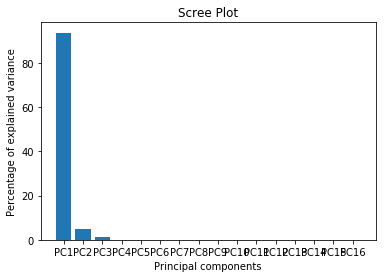

In [9]:
# Center and scale the data so that the means of each variable equals 0 and the standard deviation of each equals 1
scaled_df3 = preprocessing.scale(df3.T)

# Create PCA object
pca = PCA()

# Calculate loading scores and the variation of each principal component
pca.fit(scaled_df3)

# Generate coordinates to graph from the loading scores and scaled data. 
pca_df3 = pca.transform(scaled_df3)

# Calculate the percentage of variance that each PCA accounts for.
var_percent = np.round(pca.explained_variance_ratio_*100, decimals=1)

# Create labels for scree plot
labels = ["PC" + str(x) for x in range(1,len(var_percent)+1)]

# Create a bar plot
plt.bar(x=range(1,len(var_percent)+1), height=var_percent, tick_label=labels);
plt.xlabel('Principal components');
plt.ylabel('Percentage of explained variance');
plt.title('Scree Plot');

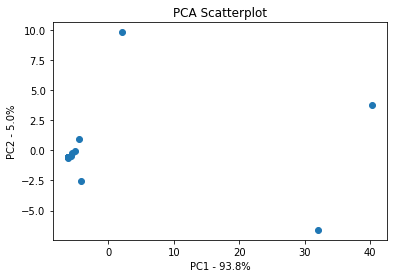

In [10]:
pca_df = pd.DataFrame(pca_df3, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2);
plt.xlabel('PC1 - {0}%'.format(var_percent[0]));
plt.ylabel('PC2 - {0}%'.format(var_percent[1]));
plt.title('PCA Scatterplot');
# Add sample names to the graph
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df.PC1.loc[sample]), (pca_df.PC2.loc[sample]))

There are various variables showing a strong correlation. Below is the top 5 loading scores.

In [30]:
df3['Country'] = df['Country']
loading_scores = pd.Series(pca.components_[0])

# sort loading scores by their magnitude
sorted_ls = loading_scores.abs().sort_values(ascending=False)

# Take the top 5 loading scores
top_5 = sorted_ls[0:5].index.values

print(loading_scores[top_5])

67     0.071912
153    0.071906
108    0.071882
131    0.071875
101    0.071872
dtype: float64
